In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import panel as pn
import pandas as pd
import hvplot.pandas  # This enhances Pandas DataFrame with hvplot method
pn.extension('hvplot')  # Loads the hvPlot extension

df = pd.read_csv('filtered.csv')
df.head(5)

df.y = df.y_xg

In [30]:
plot = df.hvplot.line('x', 'y', width=400, height=300)
# Create a simple Panel dashboard
dashboard = pn.Column("# My First Panel Dashboard", plot)
dashboard.servable()


BokehModel(combine_events=True, render_bundle={'docs_json': {'4485586b-9475-40ef-b4d8-f4935f174216': {'version…

In [31]:
def get_moving_avg(y, window_size):
    # window_size = 50
    return pd.Series(y).rolling(window=window_size).mean()


def block_mean(original_array, k):
    original_array = np.array(original_array)
    # Calculate the number of blocks
    num_blocks = len(original_array) // k
    
    # Reshape the original array into blocks of size k
    blocks = original_array[:num_blocks*k].reshape(num_blocks, k)
    
    # Calculate the mean for each block
    mean_array = np.mean(blocks, axis=1)
    
    return mean_array

In [32]:
def plot(x, y, label='', fig_size=15):
    
    fig = plt.figure(figsize=(fig_size, fig_size/2))
    plt.plot(x, y, label=label)
    plt.show()

In [33]:
from scipy import fftpack
from functools import partial

def building_plots (x, y):
    x = np.array(x)
    y = np.array(y)
    sig_fft = fftpack.fft(y)
    fig, ax = plt.subplots()
    ax.set_yscale('function', functions=(partial(np.power, 10.0), np.log10))
    ax.plot(x, sig_fft)

    

In [34]:

# data_y = block_mean(df.y, 137)
# data_x = np.linspace(1, 15, len(data_y))
# plot(data_x, data_y)
# building_plots(data_x, data_y)

c:\Users\Admin\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\Admin\anaconda3\Lib\site-packages\matplotlib\scale.py:153: RuntimeWarning: overflow encountered in power
  return self._forward(values)
c:\Users\Admin\anaconda3\Lib\site-packages\matplotlib\scale.py:153: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)


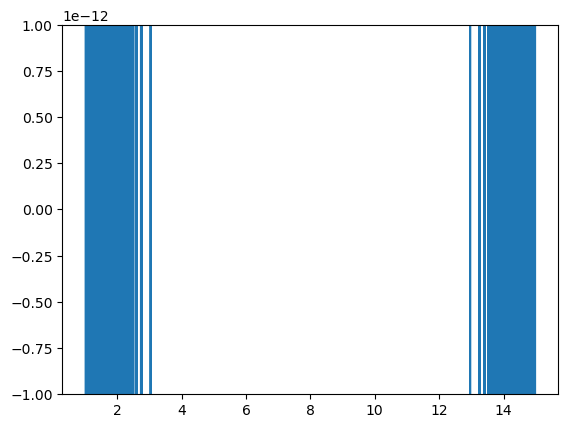

In [35]:
building_plots(df.x, df.y)

In [36]:
14 * 24 * 60

20160

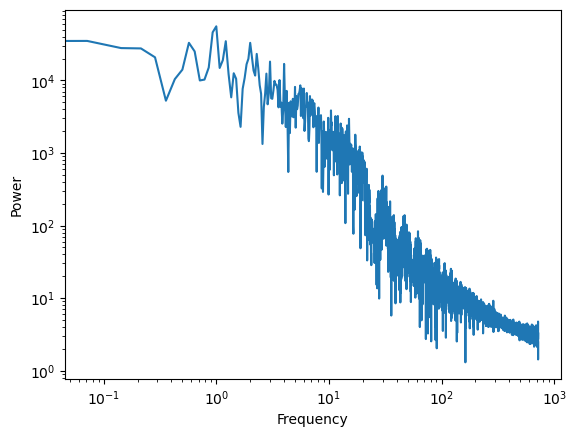

In [37]:
yf = sp.fft.fft(np.array(df.y))
duration = 14
sample_rate = 24 * 60
xf = sp.fft.fftfreq(20160, 1 / sample_rate)
fig_size = 15

fig, ax = plt.subplots()
# ax.set_yscale('function', functions=(partial(np.power, 10.0), np.log10))
# ax.set_xscale('function', functions=(partial(np.power, 10.0), np.log10))
# plt.plot(xf, np.abs(yf))
plt.plot(xf[20160//2 - 100000 + 10 : 20160//2], np.abs(yf)[20160//2 - 100000 + 10 : 20160//2 ])
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.yscale('log')
plt.xscale('log')
plt.show()

In [38]:
sample_rate

1440

In [39]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def bandpass(df, fs, lowcut=500.0, highcut=1250.0):
    # lowcut = 500.0
    # highcut = 1250.0
    return butter_bandpass_filter(df.y, lowcut, highcut, fs = 2*fs)

In [40]:
np.arange(1, 3, 0.2)

array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8])

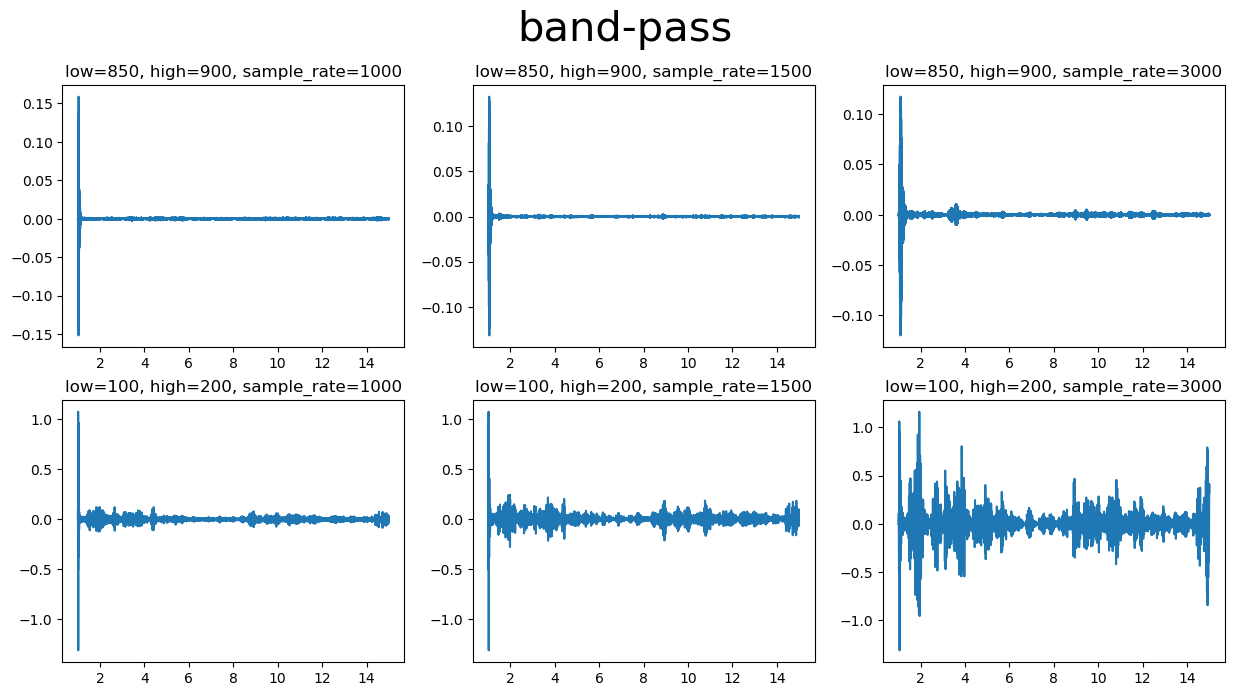

In [41]:
# fig = plt.figure(figsize=(fig_size, fig_size/2))
figure, axis = plt.subplots(2, 3, figsize=(fig_size, fig_size/2)) 
figure.suptitle('band-pass' , fontsize=30)

high = 900
low = 850
sr = 1000
axis[0, 0].plot(df.x, bandpass(df, highcut=high, lowcut=low, fs=sr)) 
axis[0, 0].set_title(f"low={low}, high={high}, sample_rate={sr}") 

# high = 600
# low = 580
sr = 1500
axis[0, 1].plot(df.x, bandpass(df, highcut=high, lowcut=low, fs=sr)) 
axis[0, 1].set_title(f"low={low}, high={high}, sample_rate={sr}") 

# high = 600
# low = 580
sr = 3000
axis[0, 2].plot(df.x, bandpass(df, highcut=high, lowcut=low, fs=sr)) 
axis[0, 2].set_title(f"low={low}, high={high}, sample_rate={sr}") 

high = 200
low = 100
sr = 1000
axis[1, 0].plot(df.x, bandpass(df, highcut=high, lowcut=low, fs=sr)) 
axis[1, 0].set_title(f"low={low}, high={high}, sample_rate={sr}") 

# high = 200
# low = 100
sr = 1500
axis[1, 1].plot(df.x, bandpass(df, highcut=high, lowcut=low, fs=sr)) 
axis[1, 1].set_title(f"low={low}, high={high}, sample_rate={sr}") 

# high = 200
# low = 100
sr = 3000
axis[1, 2].plot(df.x, bandpass(df, highcut=high, lowcut=low, fs=sr)) 
axis[1, 2].set_title(f"low={low}, high={high}, sample_rate={sr}") 

plt.show()

[ 0.01185569  0.0990944   0.38937422  0.96311169  1.68814274  2.21478361
  2.18566073  1.47930302  0.29322678 -0.97409677]


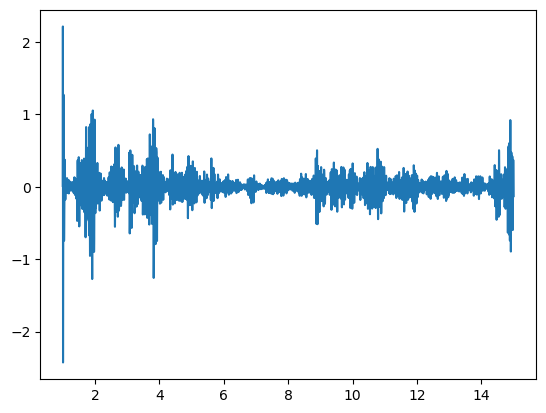

[ 0.50005862  2.33360809  4.00283479  2.70019401  0.07416699 -0.54612176
 -0.5055409  -1.46941485 -1.99995278 -1.83180368]


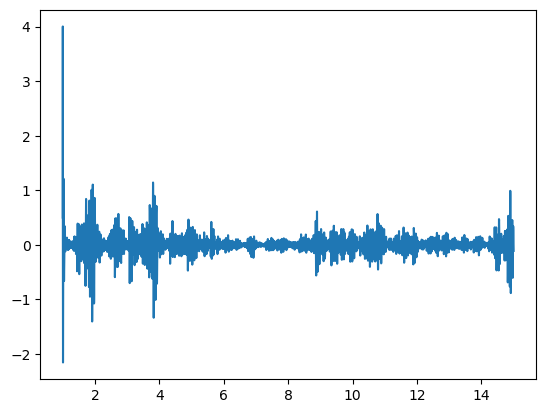

[ 3.68806402  4.0705585   1.09051851  1.15399393 -0.56494909 -0.69182384
 -1.49840862 -1.71720245 -1.89591172 -2.13474994]


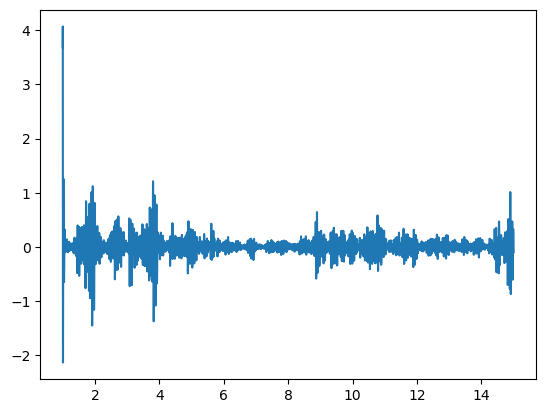

ValueError: Digital filter critical frequencies must be 0 < Wn < 1

In [42]:
for i in np.arange(1, 100, 10):
    data_y = bandpass(df, highcut=3250 + 500*i, fs=sample_rate * 10)
    plt.plot(df.x, data_y)
    print(data_y[:10])
    plt.show()

In [ ]:
import numpy as np
from scipy.fft import fft, ifft

def low_pass_filter(signal, sample_rate, cutoff_freq):
    signal = np.array(signal)
    # FFT
    fft_signal = fft(signal)
    # Number of signal points
    N = len(signal)
    # Frequency array
    freq = np.fft.fftfreq(N, d=1/sample_rate)
    
    # Suppress high frequencies
    fft_signal[np.abs(freq) > cutoff_freq] = 0
    
    # IFFT
    filtered_signal = ifft(fft_signal)
    
    return filtered_signal.real  # Return the real part of the inverse FFT

data = low_pass_filter(df.y, 1.2, 20)
# plot(df.x, data)

: 